In [5]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.graph_objects as go

In [6]:
file_path = '/kaggle/input/dataset-sncb/dataset_ar41_for_ulb.csv'
data = pd.read_csv(file_path)

In [7]:
anomaly_condition = ((data['RS_E_InAirTemp_PC1'] > 65) | (data['RS_E_InAirTemp_PC2'] > 65) | 
                    (data['RS_T_OilTemp_PC1'] > 115) | (data['RS_T_OilTemp_PC2'] > 115)| 
                    (data['RS_E_WatTemp_PC1'] > 100) | (data['RS_E_WatTemp_PC2'] > 100))

data['Anomaly_Flag'] = anomaly_condition.astype(int)

In [8]:
data['timestamps_floor'] = pd.to_datetime(data['timestamps_floor'])

data['Hour'] = data['timestamps_floor'].dt.hour
data['Day_of_Week'] = data['timestamps_floor'].dt.day_name()
data['Month'] = data['timestamps_floor'].dt.month_name()

In [9]:
anomalies_by_hour = data[data['Anomaly_Flag'] == 1].groupby('Hour')['Anomaly_Flag'].count()
anomalies_by_day = data[data['Anomaly_Flag'] == 1].groupby('Day_of_Week')['Anomaly_Flag'].count()
anomalies_by_month = data[data['Anomaly_Flag'] == 1].groupby('Month')['Anomaly_Flag'].count()

(anomalies_by_hour, anomalies_by_day, anomalies_by_month)

(Hour
 0      311
 1       75
 2      103
 3      280
 4      490
 5      613
 6     2156
 7     4179
 8     2850
 9     4011
 10    4193
 11    6979
 12    6623
 13    3226
 14    3911
 15    3243
 16    3970
 17    4589
 18    4046
 19    4797
 20    3938
 21    7297
 22    5561
 23    2474
 Name: Anomaly_Flag, dtype: int64,
 Day_of_Week
 Friday       13303
 Monday       13290
 Saturday      8771
 Sunday        6841
 Thursday     13510
 Tuesday      12279
 Wednesday    11921
 Name: Anomaly_Flag, dtype: int64,
 Month
 April         2970
 August       12129
 February      2359
 January        840
 July         10889
 June         27023
 March         1835
 May          10728
 September    11142
 Name: Anomaly_Flag, dtype: int64)

**Anomalies by Hour of the Day:** This bar chart shows that anomalies peak around noon and in the late evening, specifically around 11 AM and 9 PM. The early morning hours (12 AM to 5 AM) have the lowest frequency of anomalies.

**Anomalies by Day of the Week:** Anomalies are fairly evenly distributed throughout the week with a slight increase on Thursdays.
The weekends (Saturday and Sunday) show a lower frequency of anomalies, which may be due to reduced train operation.

**Anomalies by Month:** There is a clear seasonal pattern, with the highest number of anomalies occurring in the summer months (April, May, June, July, August, and September). The winter and early spring months (January, March, April) show the fewest anomalies.

/tmp/ipykernel_13/884057409.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Hour', y='Anomaly_Flag', data=hourly_data, ax=axes[0], palette="Blues_d")
/tmp/ipykernel_13/884057409.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Day_of_Week', y='Anomaly_Flag', data=daily_data, ax=axes[1], palette="Greens_d")
/tmp/ipykernel_13/884057409.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Month', y='Anomaly_Flag', data=monthly_data, ax=axes[2], palette="Reds_d")


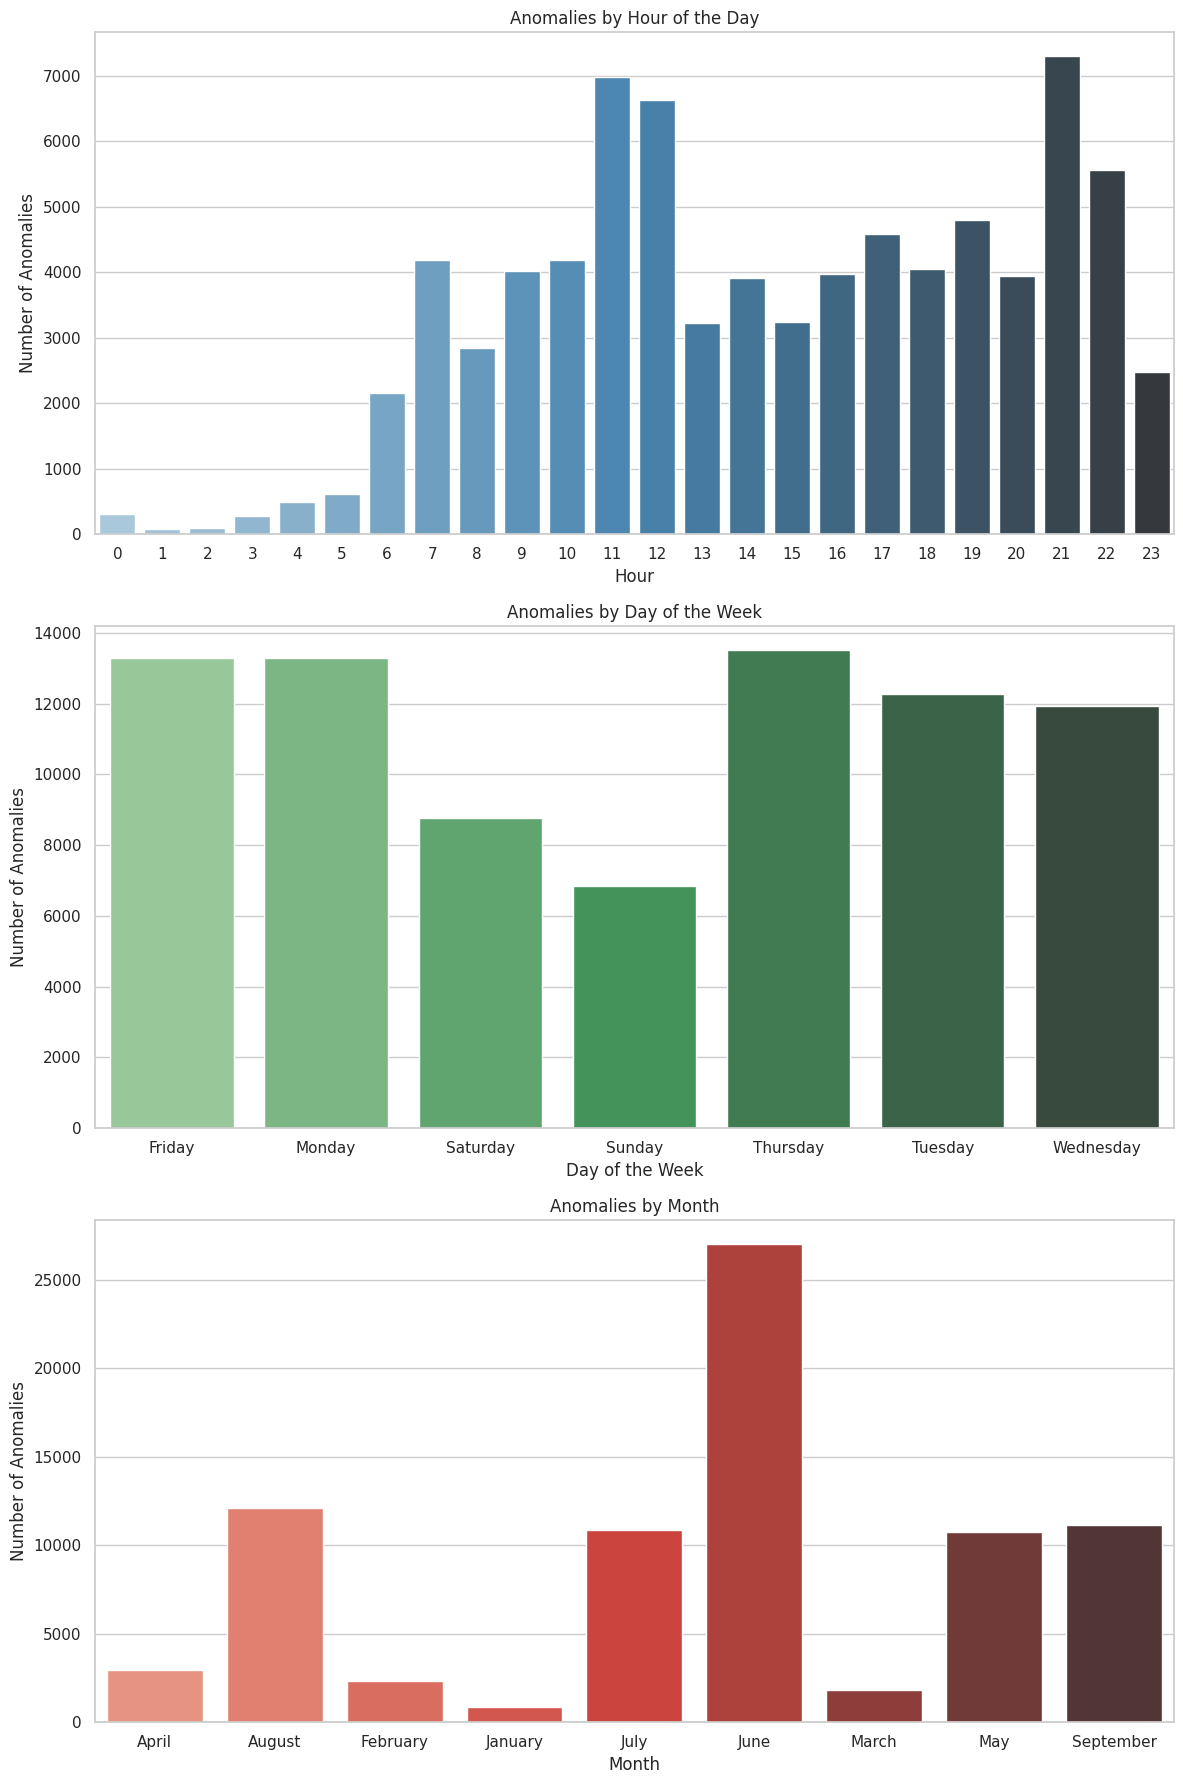

In [10]:
sns.set(style="whitegrid")

hourly_data = anomalies_by_hour.reset_index()
daily_data = anomalies_by_day.reset_index()
monthly_data = anomalies_by_month.reset_index()

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 18))

sns.barplot(x='Hour', y='Anomaly_Flag', data=hourly_data, ax=axes[0], palette="Blues_d")
axes[0].set_title('Anomalies by Hour of the Day')
axes[0].set_xlabel('Hour')
axes[0].set_ylabel('Number of Anomalies')

sns.barplot(x='Day_of_Week', y='Anomaly_Flag', data=daily_data, ax=axes[1], palette="Greens_d")
axes[1].set_title('Anomalies by Day of the Week')
axes[1].set_xlabel('Day of the Week')
axes[1].set_ylabel('Number of Anomalies')

sns.barplot(x='Month', y='Anomaly_Flag', data=monthly_data, ax=axes[2], palette="Reds_d")
axes[2].set_title('Anomalies by Month')
axes[2].set_xlabel('Month')
axes[2].set_ylabel('Number of Anomalies')

plt.tight_layout()

plt.show()

**Observation Each Day:** Higher frequencies of anomalies are noticeable during late morning and evening hours. Early morning hours generally show fewer anomalies.

**Observation Each Month:** The summer months exhibit a higher frequency of anomalies, particularly on specific days of the week. Winter months show fewer anomalies, suggesting a possible correlation with ambient temperatures.

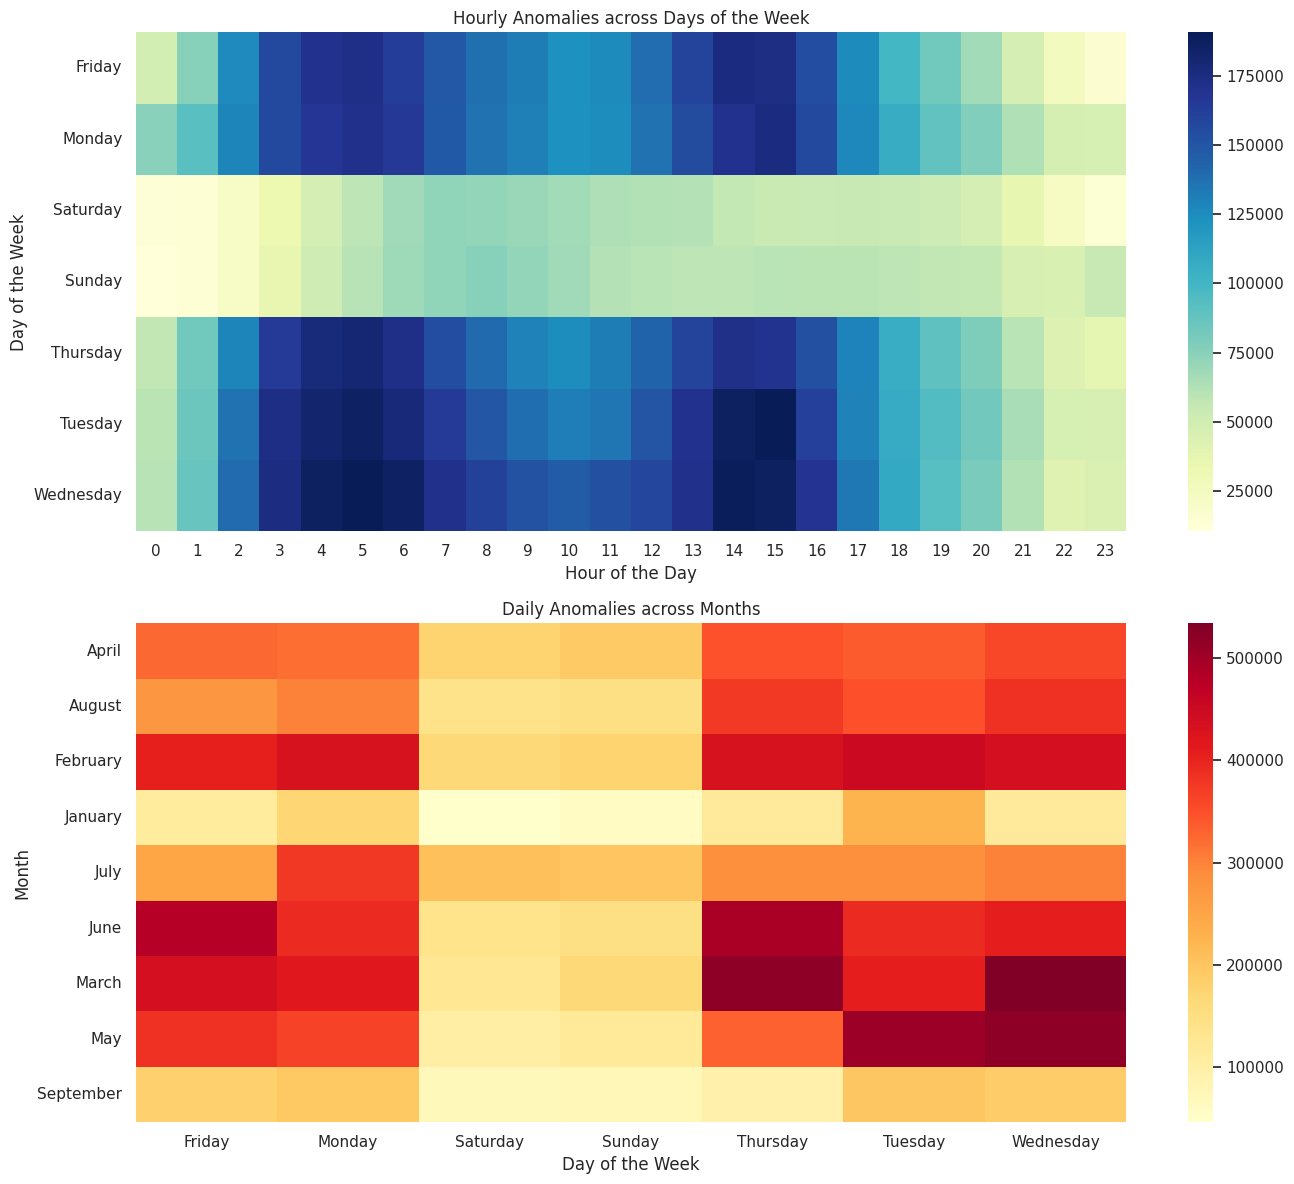

In [11]:
hourly_pivot = data.pivot_table(index='Day_of_Week', columns='Hour', values='Anomaly_Flag', aggfunc='count')
monthly_pivot = data.pivot_table(index='Month', columns='Day_of_Week', values='Anomaly_Flag', aggfunc='count')

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 12))

sns.heatmap(hourly_pivot, cmap="YlGnBu", ax=axes[0])
axes[0].set_title('Hourly Anomalies across Days of the Week')
axes[0].set_xlabel('Hour of the Day')
axes[0].set_ylabel('Day of the Week')

sns.heatmap(monthly_pivot, cmap="YlOrRd", ax=axes[1])
axes[1].set_title('Daily Anomalies across Months')
axes[1].set_xlabel('Day of the Week')
axes[1].set_ylabel('Month')

plt.tight_layout()

plt.show()


# Correlation Between External Weather Conditions and Anomalies in Train Cooling Systems

1. Air Temperature Anomalies:
External Temperature: Shows a weak positive correlation, indicating a slight increase in air temperature anomalies with higher external temperatures.
Humidity and Rain: Both show very weak negative correlations with air temperature anomalies, suggesting that higher humidity or rainfall slightly reduces the likelihood of these anomalies, though the effect is minimal.
2. Water Temperature Anomalies:
Overall: Very weak or negligible correlations with all weather conditions. This suggests that external weather has little to no direct influence on water temperature anomalies in the cooling systems.
3. Oil Temperature Anomalies:
Indicating no variation for a meaningful correlation assessment. This could be due to the rarity of oil temperature anomalies in the dataset.

In [12]:
data['Air_Temp_Anomaly'] = ((data['RS_E_InAirTemp_PC1'] > 65) | (data['RS_E_InAirTemp_PC2'] > 65)).astype(int)
data['Water_Temp_Anomaly'] = ((data['RS_E_WatTemp_PC1'] > 100) | (data['RS_E_WatTemp_PC2'] > 100)).astype(int)
data['Oil_Temp_Anomaly'] = ((data['RS_T_OilTemp_PC1'] > 115) | (data['RS_T_OilTemp_PC2'] > 115)).astype(int)

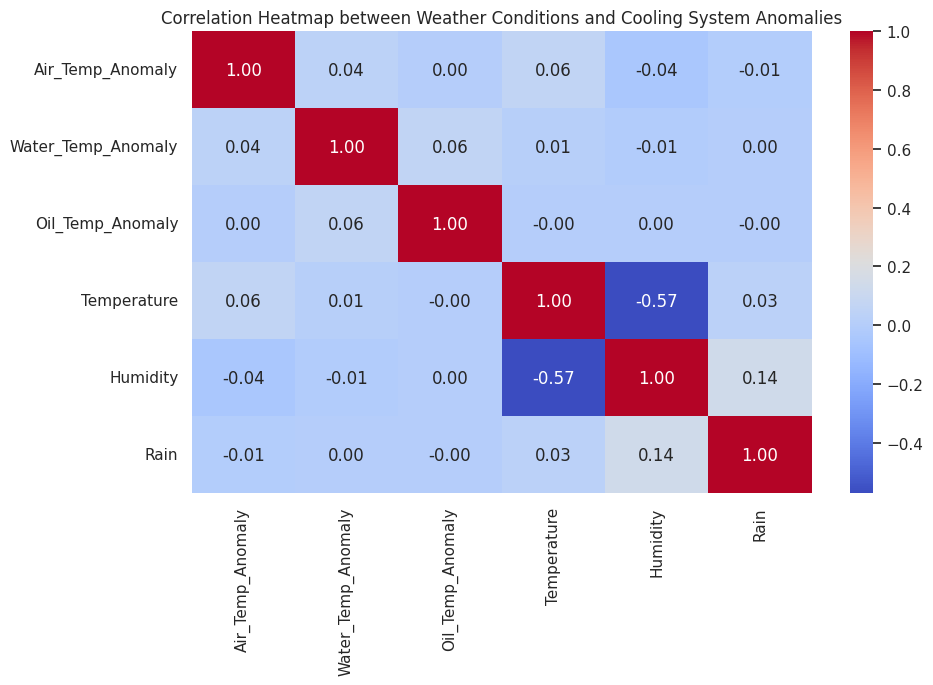

In [13]:
correlation_matrix = data[['Air_Temp_Anomaly', 'Water_Temp_Anomaly', 'Oil_Temp_Anomaly', 
                           'Temperature', 'Humidity', 'Rain']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap between Weather Conditions and Cooling System Anomalies')
plt.show()